# 任务3代码说明
本部分代码仅做YOLO使用参考，具体需要自己按照赛事要求进行修改，请从下列代码中，找到并摘取你所需要的代码，进行上分实践吧~

## 安装环境

In [1]:
!/opt/miniconda/bin/pip install opencv-python pandas matplotlib ultralytics > /dev/null
!apt install zip unzip -y > /dev/null
!apt install unar -y > /dev/null



Scanning processes...                                                           
Scanning linux images...                                                        

Running kernel seems to be up-to-date.

No services need to be restarted.

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.


Scanning processes...                                                           
Scanning linux images...                                                        

Running kernel seems to be up-to-date.

No services need to be restarted.

No containers need to be restarted.

No user sessions are running outdated binaries.

No VM guests are running outdated hypervisor (qemu) binaries on this host.


In [2]:
!wget http://mirror.coggle.club/yolo/fan-yolo-dataset.zip
!unzip -q fan-yolo-dataset.zip

--2024-08-23 02:28:29--  http://mirror.coggle.club/yolo/fan-yolo-dataset.zip
Resolving mirror.coggle.club (mirror.coggle.club)... 101.206.244.156, 101.206.244.157, 101.206.244.158, ...
Connecting to mirror.coggle.club (mirror.coggle.club)|101.206.244.156|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17447094 (17M) [application/zip]
Saving to: ‘fan-yolo-dataset.zip’

fan-yolo-dataset.zi 100%[===================>]  16.64M  8.00MB/s    in 2.1s    

2024-08-23 02:28:32 (8.00 MB/s) - ‘fan-yolo-dataset.zip’ saved [17447094/17447094]



## 构建数据集

In [3]:
import os
dir_path = os.path.abspath('./') + '/'

with open('fan-yolo-dataset/yolo.yaml', 'w', encoding='utf-8') as up:
    up.write(f'''
path: {dir_path}/fan-yolo-dataset/
train: train/
val: val/

names:
    0: 电风扇

''')

In [4]:
!wget -q http://mirror.coggle.club/yolo/yolov8n-v8.2.0.pt -O yolov8n.pt

!mkdir -p ~/.config/Ultralytics/
!wget -q http://mirror.coggle.club/yolo/Arial.ttf -O ~/.config/Ultralytics/Arial.ttf
!wget -q http://mirror.coggle.club/yolo/Arial.Unicode.ttf -O ~/.config/Ultralytics/Arial.Unicode.ttf

## imgsz

In [7]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['YOLO_VERBOSE'] = 'False'

import warnings
warnings.filterwarnings('ignore')

from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="fan-yolo-dataset/yolo.yaml", epochs=1, batch=16, imgsz=416)

Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=fan-yolo-dataset/yolo.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

train: Scanning /root/fan-yolo-dataset/train.cache... 343 images, 0 backgrounds, 0 corrupt: 100%|██████████| 343/343 [00:00<?, ?it/s]
val: Scanning /root/fan-yolo-dataset/val.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1       1.6G      0.841      1.909      1.139         19        416: 100%|██████████| 22/22 [00:01<00:00, 15.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]


                   all         21         41      0.871      0.493      0.708      0.529

1 epochs completed in 0.034 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.31it/s]


                   all         21         41      0.871      0.494      0.708      0.531
Speed: 0.0ms preprocess, 0.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train10


In [8]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="fan-yolo-dataset/yolo.yaml", epochs=1, batch=16, imgsz=1280)

Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=fan-yolo-dataset/yolo.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /root/fan-yolo-dataset/train.cache... 343 images, 0 backgrounds, 0 corrupt: 100%|██████████| 343/343 [00:00<?, ?it/s]
val: Scanning /root/fan-yolo-dataset/val.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 1280 train, 1280 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1       9.9G     0.9589      3.096      1.571         19       1280: 100%|██████████| 22/22 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         21         41          1      0.191      0.898      0.665


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f9471402170>
Traceback (most recent call last):
  File "/opt/miniconda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/opt/miniconda/lib/python3.10/site-packages/torch/utils/data/dataloader.py", line 1443, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/miniconda/lib/python3.10/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/opt/miniconda/lib/python3.10/multiprocessing/popen_fork.py", line 40, in wait
    if not wait([self.sentinel], timeout):
  File "/opt/miniconda/lib/python3.10/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/opt/miniconda/lib/python3.10/selectors.py", line 416, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 



1 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.4MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.15it/s]


                   all         21         41          1      0.191      0.897      0.665
Speed: 0.3ms preprocess, 1.3ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train11


## augmentation

In [1]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")
results = model.train(data="fan-yolo-dataset/yolo.yaml", epochs=10, batch=16, mixup=0.4, copy_paste=0.5, mosaic=0)

Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=fan-yolo-dataset/yolo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

/opt/miniconda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /root/fan-yolo-dataset/train.cache... 343 images, 0 backgrounds, 0 corrupt: 100%|██████████| 343/343 [00:00<?, ?it/s]
val: Scanning /root/fan-yolo-dataset/val.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]


Plotting labels to runs/detect/train14/labels.jpg... 


/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:873: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:873: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:873: UserWarning: Glyph 25159 (\N{CJK UNIFIED IDEOGRAPH-6247}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:873: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/plotting.py:873: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train14
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.48G     0.7185      2.158      1.182          8        640: 100%|██████████| 22/22 [00:02<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         21         41      0.997      0.512      0.647      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.45G     0.6804      1.381      1.091         10        640: 100%|██████████| 22/22 [00:01<00:00, 18.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.21it/s]

                   all         21         41          1      0.344      0.601      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.46G     0.6927      1.239      1.074         14        640: 100%|██████████| 22/22 [00:01<00:00, 18.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.59it/s]

                   all         21         41      0.949      0.439      0.709      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.45G     0.6806      1.119      1.086          7        640: 100%|██████████| 22/22 [00:01<00:00, 18.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.40it/s]

                   all         21         41      0.859      0.683      0.831      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.45G     0.6677      1.037      1.078          7        640: 100%|██████████| 22/22 [00:01<00:00, 17.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.37it/s]

                   all         21         41      0.893      0.854      0.916      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.46G     0.6298     0.9137      1.051         12        640: 100%|██████████| 22/22 [00:01<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.31it/s]

                   all         21         41      0.974      0.907      0.952      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.45G     0.6051     0.8704      1.037         17        640: 100%|██████████| 22/22 [00:01<00:00, 18.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         21         41      0.901      0.883      0.934      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.46G     0.5555     0.7615     0.9886         15        640: 100%|██████████| 22/22 [00:01<00:00, 18.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.38it/s]

                   all         21         41      0.967      0.902      0.966      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.46G     0.5129     0.7142     0.9776         10        640: 100%|██████████| 22/22 [00:01<00:00, 18.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.52it/s]

                   all         21         41      0.929      0.951      0.967       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.46G     0.4749      0.656     0.9422         17        640: 100%|██████████| 22/22 [00:01<00:00, 18.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.06it/s]

                   all         21         41      0.975      0.946      0.967        0.8



10 epochs completed in 0.005 hours.
Optimizer stripped from runs/detect/train14/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train14/weights/best.pt, 6.2MB

Validating runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.2.80 🚀 Python-3.10.13 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.03it/s]
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:466: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:466: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:466: UserWarning: Glyph 25159 (\N{CJK UNIFIED IDEOGRAPH-6247}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:491: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralyt

                   all         21         41      0.975      0.946      0.967      0.799


/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:491: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:491: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:491: UserWarning: Glyph 25159 (\N{CJK UNIFIED IDEOGRAPH-6247}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:428: UserWarning: Glyph 30005 (\N{CJK UNIFIED IDEOGRAPH-7535}) missing from font(s) DejaVu Sans.
  fig.savefig(plot_fname, dpi=250)
/opt/miniconda/lib/python3.10/site-packages/ultralytics/utils/metrics.py:428: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from font(s) DejaVu Sans.
  fig.savefig(pl

Speed: 0.1ms preprocess, 0.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train14


## prediction

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9112], device='cuda:0')
data: tensor([[111.2665, 130.6370, 399.1879, 396.9669,   0.9112,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (500, 500)
shape: torch.Size([1, 6])
xywh: tensor([[255.2272, 263.8020, 287.9214, 266.3299]], device='cuda:0')
xywhn: tensor([[0.5105, 0.5276, 0.5758, 0.5327]], device='cuda:0')
xyxy: tensor([[111.2665, 130.6370, 399.1879, 396.9669]], device='cuda:0')
xyxyn: tensor([[0.2225, 0.2613, 0.7984, 0.7939]], device='cuda:0')


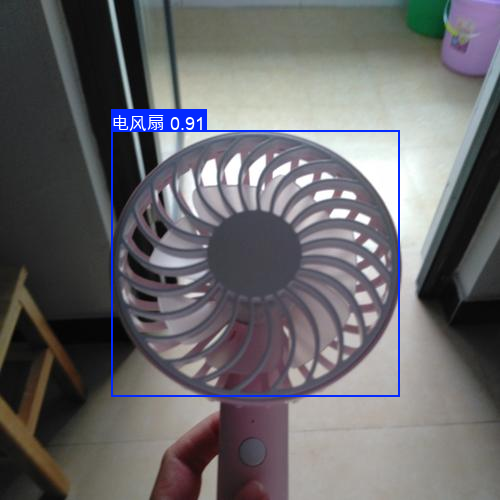

In [2]:
import glob

results = model(glob.glob('fan-yolo-dataset/test/*'), verbose=False)
for result in results:
    print(result.boxes)
    result.show()
    break

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (500, 500)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))


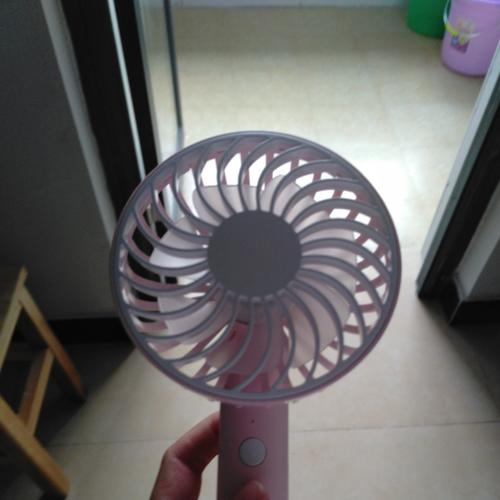

In [4]:
results = model(glob.glob('fan-yolo-dataset/test/*'), verbose=False, conf=0.99)
for result in results:
    print(result.boxes)
    result.show()
    break

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.9550], device='cuda:0')
data: tensor([[105.4015, 131.3887, 402.8269, 400.9729,   0.9550,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (500, 500)
shape: torch.Size([1, 6])
xywh: tensor([[254.1142, 266.1808, 297.4255, 269.5842]], device='cuda:0')
xywhn: tensor([[0.5082, 0.5324, 0.5949, 0.5392]], device='cuda:0')
xyxy: tensor([[105.4015, 131.3887, 402.8269, 400.9729]], device='cuda:0')
xyxyn: tensor([[0.2108, 0.2628, 0.8057, 0.8019]], device='cuda:0')


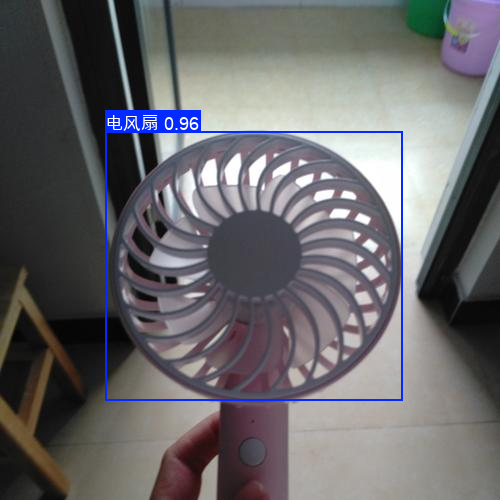

In [10]:
results = model(glob.glob('fan-yolo-dataset/test/*'), verbose=False, augment=True)
for result in results:
    print(result.boxes)
    result.show()
    break